<a href="https://colab.research.google.com/github/Jorgee18/ADA-Informes/blob/main/Quicksort.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# **1. Problema de ordenamiento**
**Entrada**: Un conjunto de n numeros $[a_1,a_2,...,a_n]$.

**Salida**: Secuencia ordenada de la entrada $[a_1',a_2',...,a_n']$ de forma que quede cada numero al momento de su salida sea menor al anterior $a_1'\leq a_2' \leq... \leq a_n'$. 

QuickSort es un algoritmo que mediante el uso de divide y venceras, ordena los numeros de un arreglo de menor a mayor. Es un metodo de ordenamiento con una complejidad de su peor caso de O(nxn), siendo esta una gran desventaja, pero sigue siendo usado debido a su complejidad O(nlogn) en su caso promedio.

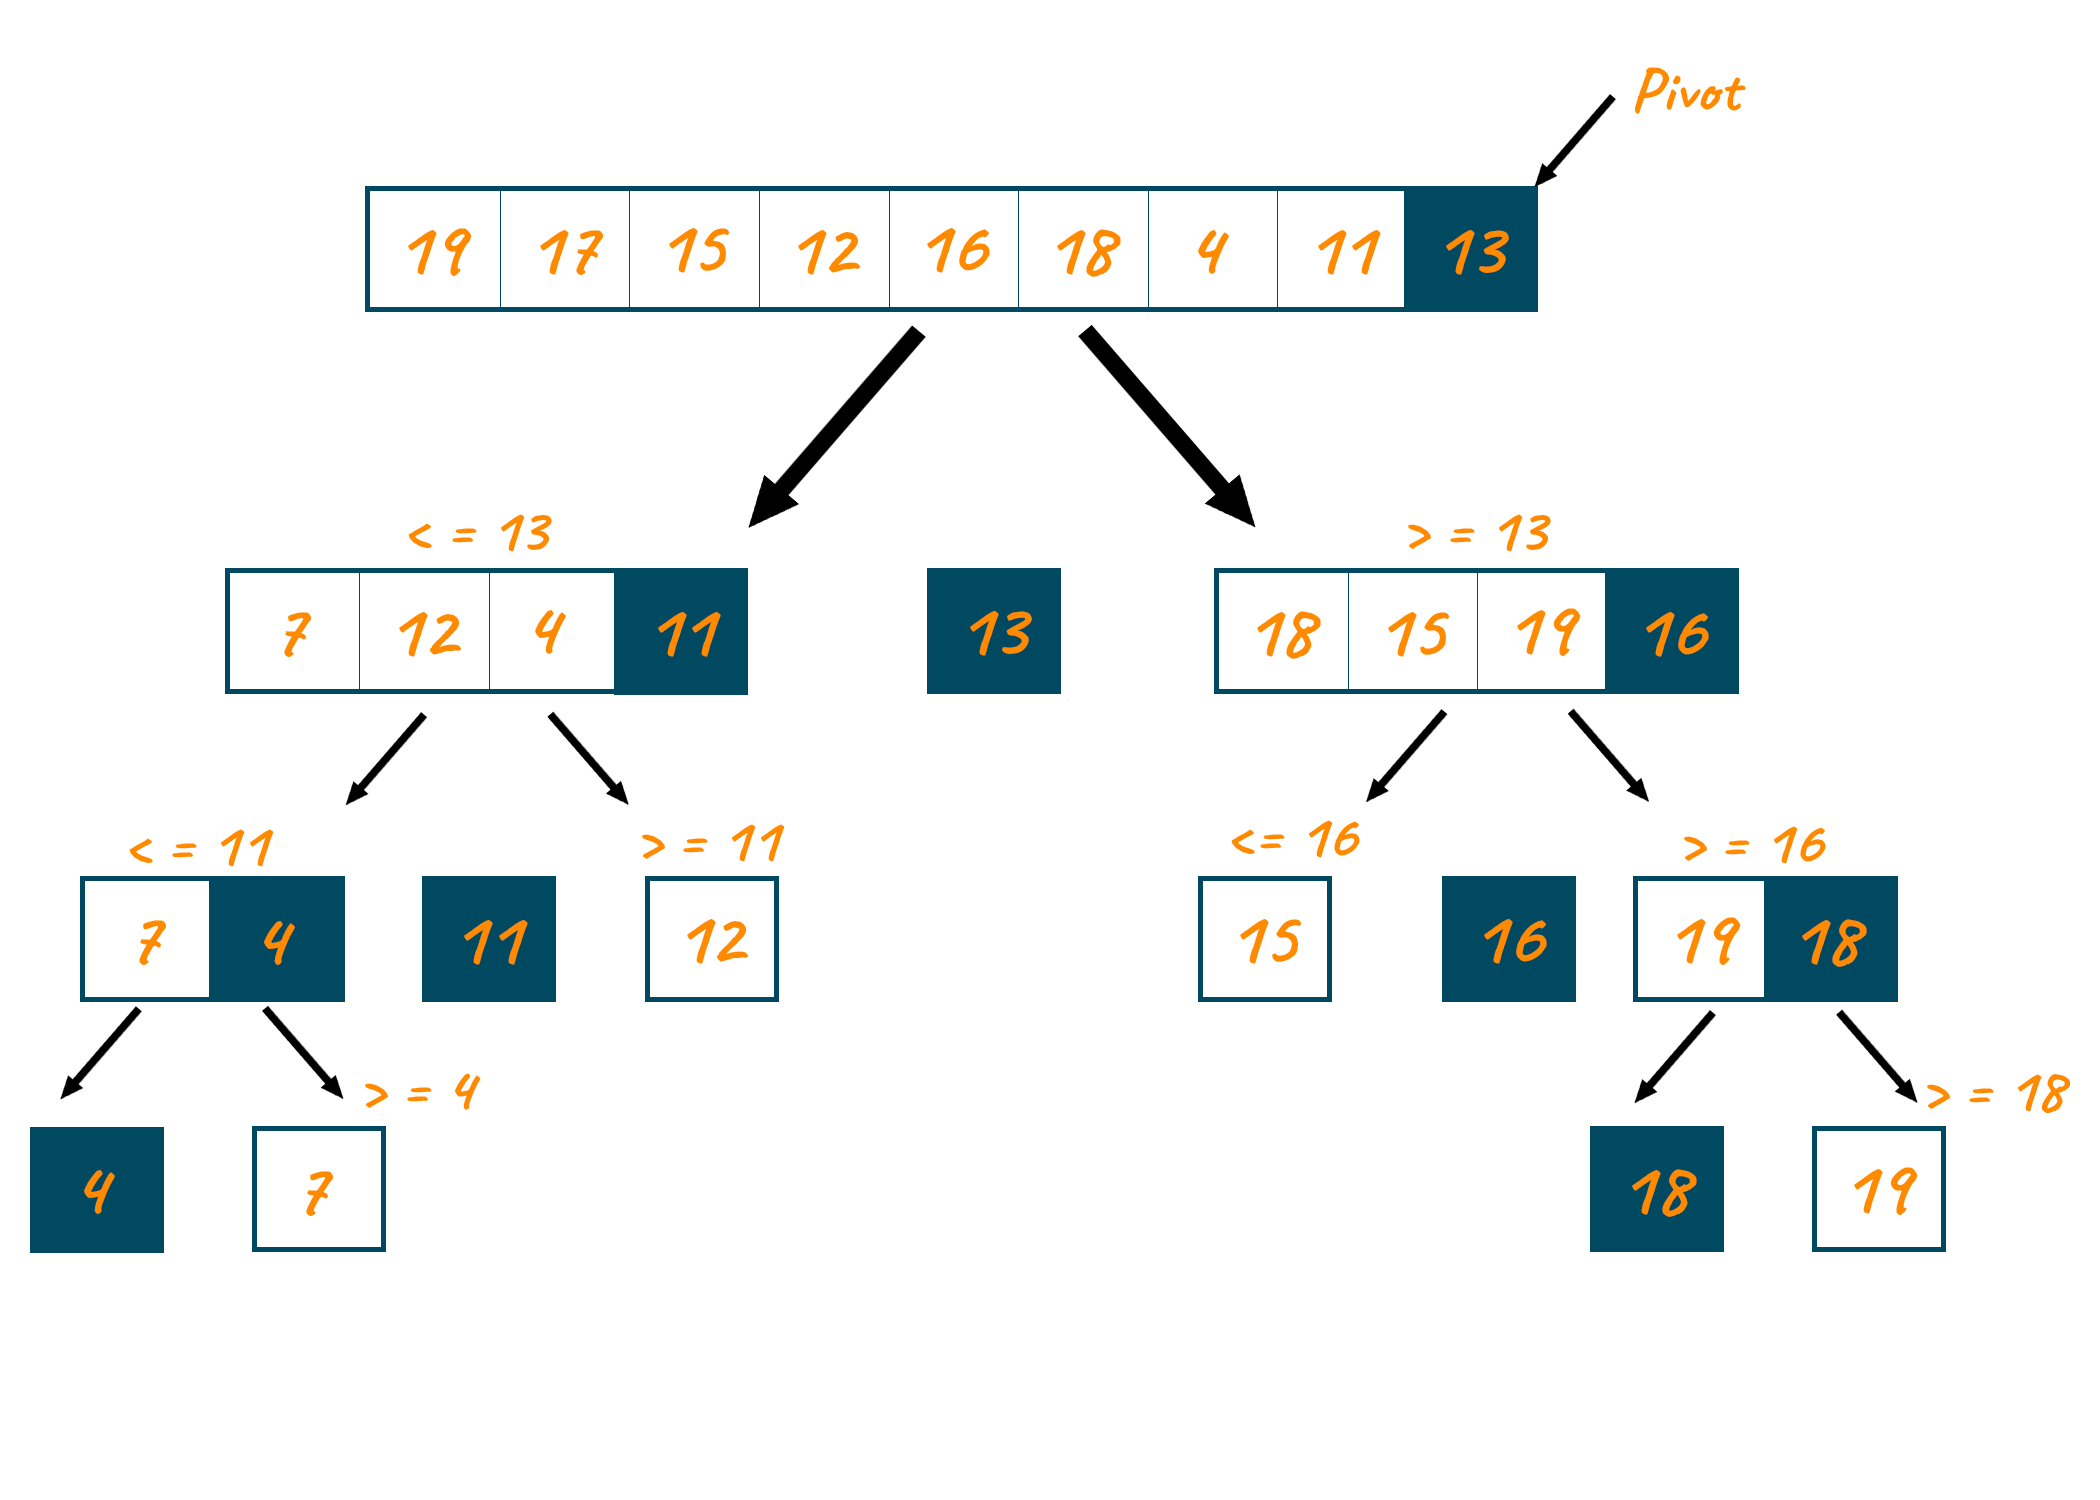


# 2.Algoritmo
A continuacion se mostrara el funcionamiento tanto del **Partition** como de **QuickSort**.


In [97]:
import random as rd
import matplotlib.pyplot as plt
import datetime
import math as mt
from timeit import repeat
from termcolor import colored
import statistics as st

In [ ]:
"""Codigo Partition

def Partition1(a):
  i = -1
  j = 0
  pivote = int (len(a) - 1)
  while (True):
    if a[j] > a[pivote]:
      j = j + 1
    else:
      i = i + 1
      a[i], a[j] = a[j], a[i]
      j = j + 1

    if j == len(a):
      a[i + 1], a[pivote] = a[pivote], a[i+1] 
      break
  
  return a"""


In [145]:
#Codigo Partition cuando el pivote se enceuntre en el comienzo.

def Partition1(a, low, high, verbose, cont):
  pivote = a[low]
  a[low],a[high] = a[high],a[low] #Cambia el pivote a la posicion del comienzo.
  i = low - 1

  if verbose:
    print("Pivote:", (colored(f"{str(pivote)}","red")))
  for j in range (low, high):
    if verbose:
      print(a)
      print("Numero comparado con el pivote",(colored(f"{str(a[j])}","green"))) 
    cont = cont + 1
    if a[j] <= pivote: #Numero con el que se compara el pivote.
      if verbose:
        print("Debido a que el numero comparado es menor al pivote se realiza un cambio")
        print("Numeros Intercambiados:", a[i+1],"->", a[j])
      i = i + 1
      a[i], a[j] = a[j], a[i] #Debido a que el numero es menor al pivote de realiza un cambio de la posicion i con la j y se aumentan ambos indices.
      
    if verbose:
      print("")
  a[i + 1], a[high] = a[high], a[i+1] #Al terminar la busqueda el pivote se cambia por la posicion i + 1.

  if verbose:
    print((colored(f"{str(a[:])}","blue")))
    print("Todo lo menor al pivote ha quedado a la izquierda y lo mayor a la derecha")
    print("Vuelta Finalizada")
    print("")
  return i + 1, cont




In [140]:
#Codigo Partition para cuando el pivote se encuentre al final.

def Partition2(a, low, high, verbose, cont):
  pivote = a[high] #Pivote en la posicion final.
  i = low - 1

  if verbose:
    print("Pivote:", (colored(f"{str(pivote)}","red")))
  for j in range (low, high):
    if verbose:
      print(a)
      print("Numero comparado con el pivote",(colored(f"{str(a[j])}","green")))
    cont = cont + 1
    if a[j] <= pivote: #Numero con el que se compara el pivote.
      if verbose:
        print("Debido a que el numero comparado es menor al pivote se realiza un cambio")
        print("Numeros Intercambiados:", a[i+1],"->", a[j])
      i = i + 1
      (a[i], a[j]) = (a[j], a[i]) #Debido a que el numero es menor al pivote de realiza un cambio de la posicion i con la j y se aumentan ambos indices.
      
    if verbose:
      print("")
  (a[i + 1], a[high]) = (a[high], a[i+1])  #Al terminar la busqueda el pivote se cambia por la posicion i + 1.

  if verbose:
    print((colored(f"{str(a[:])}","blue")))
    print("Todo lo menor al pivote ha quedado a la izquierda y lo mayor a la derecha")
    print("Vuelta Finalizada")
    print("")
  return i + 1, cont 







In [164]:
#Codigo Partition para cuando el pivote sea la mediana de tres numeros aleatorios.

def Partition3(a, low, high, verbose, cont):
  b = []
  c = []
  for k in range(0,3): #Se busca como pivote la mediana de tres numeros aleatorios del arreglo.
    b.append(rd.randint(low,high))
    c.append(a[b[k]])
  mediana = st.median(c)
  
  for l in (b):
    if mediana == a[l]:
      a[l],a[high] = a[high],a[l]

  pivote = a[high]
  i = low - 1

  if verbose:
    print("Pivote:", (colored(f"{str(pivote)}","red")))
  for j in range (low, high):
    if verbose:
      print(a)
      print("Numero comparado con el pivote",(colored(f"{str(a[j])}","green")))
    cont = cont + 1

    if a[j] <= pivote:  #Numero con el que se compara el pivote.
      if verbose:
        print("Debido a que el numero comparado es menor al pivote se realiza un cambio")
        print("Numeros Intercambiados:", a[i+1],"->", a[j])
      i = i + 1
      a[i], a[j] = a[j], a[i] #Debido a que el numero es menor al pivote de realiza un cambio de la posicion i con la j y se aumentan ambos indices.
      
    if verbose:
      print("")
  a[i + 1], a[high] = a[high], a[i+1]  #Al terminar la busqueda el pivote se cambia por la posicion i + 1.

  if verbose:
    print((colored(f"{str(a[:])}","blue")))
    print("Todo lo menor al pivote ha quedado a la izquierda y lo mayor a la derecha")
    print("Vuelta Finalizada")
    print("")
  return i + 1, cont

In [158]:
#Codigo QuickSort

def QuickSort(a, low, high, verbose = False, cont = 0 , tipo = 0):
  if low < high:
    if tipo == 0:
      pivote, cont = Partition1(a, low, high,verbose, cont)
    else:
      if tipo == 1:
        pivote, cont = Partition2(a, low, high,verbose, cont)
      else:
        pivote, cont = Partition3(a, low, high,verbose, cont)
    cont = QuickSort(a, low, pivote - 1,verbose, cont, tipo)
    cont = QuickSort(a, pivote + 1, high,verbose, cont, tipo)
  return cont
    

# 2.2. Descripcion del algoritmo
El algoritmo recibe un conjunto de numeros aleatorios en un arreglo y devuelve como resultado un arreglo ordenado con numeros de menor a mayor.

1. Para comenzar a trabajar el algoritmo mediante la funcion Partition ordena el arreglo con los numeros menor al pivote a la izquierda y mayores que el a la derecha.

2. El proceso realizado por Partition nos deja un arreglo que a continuacion es partido a la mitad.

3. Tras esto se llama a la funcion QuickSort para que ordene el arreglo.

# 2.3. Ejemplo
a = $[8,10,4,3,11,9,7]$
Si el numero es menor que el pivote este sera cambiado por la posicion en que se enceuntre $i$ en caso contrario solo $j$ aumentara.

Se elige como pivote la ultima posicion del arreglo en este caso el numero 7.

 $[8,10,4,3,11,9,7]$
 
 i = a[-1]
 j = a[0]

Debido a que tanto el numero 8 como el 10 son mayores que el 7 no ocurre ningun cambio y solo aumenta el indice $j$.

 $[8,10,4,3,11,9,7]$
 
 i = a[-1]
 j = a[1]

Como se puede ver el numero 4 es menor al 7 por lo que se genera un cambio entre la posicion $a[i + 1]$ y la posicion $a[j]$.

 $[4,10,8,3,11,9,7]$
 
 i = a[0]
 j = a[2]

Como el 3 es menor se genera un cambio entre la posicion $a[i + 1]$ y la posicion $a[j]$.

 $[4,3,8,10,11,9,7]$
 
 i = a[1]
 j = a[3]

Debido a que el 11 es menor al pivote no se genera un cambio.

 $[4,3,8,10,11,9,7]$
 
 i = a[1]
 j = a[4]

Debido a que el 9 es mayor y no hay mas comparaciones por realizarse el pivote es insertado en la posicion $a[i + 1]$.

 $[4,3,7,8,10,11,9]$

Dejando asi un arreglo con los menores al pivote a la izquierda y mayores a la derecha.

Se procede a utilizar la funcion QuickSort que funciona recursivamente, de forma que ordena los los numeros que se encuentran a la izquierda del pivote como a la derecha dejando asi un arreglo ordenado.

 $[3,4,7,8,9,10,11]$



# 2.4. Ejecucion del algoritmo paso a paso (verbose=True)
Debido a esta opcion podemos ver el funcionamiento paso a paso en cada iteracion.

In [187]:
#Codigo QuickSort
#a = [3,2,8,1,5]
a = [9,-3,5,2,6,8,-6,1,3]
print("Arreglo: ",a)
cont = QuickSort(a, 0, len(a) - 1, True, 0, 1)
print("Arreglo Ordenado:",a, "Comparaciones :", cont)





Arreglo:  [9, -3, 5, 2, 6, 8, -6, 1, 3]
Pivote: 3
[9, -3, 5, 2, 6, 8, -6, 1, 3]
Numero comparado con el pivote 9

[9, -3, 5, 2, 6, 8, -6, 1, 3]
Numero comparado con el pivote -3
Debido a que el numero comparado es menor al pivote se realiza un cambio
Numeros Intercambiados: 9 -> -3

[-3, 9, 5, 2, 6, 8, -6, 1, 3]
Numero comparado con el pivote 5

[-3, 9, 5, 2, 6, 8, -6, 1, 3]
Numero comparado con el pivote 2
Debido a que el numero comparado es menor al pivote se realiza un cambio
Numeros Intercambiados: 9 -> 2

[-3, 2, 5, 9, 6, 8, -6, 1, 3]
Numero comparado con el pivote 6

[-3, 2, 5, 9, 6, 8, -6, 1, 3]
Numero comparado con el pivote 8

[-3, 2, 5, 9, 6, 8, -6, 1, 3]
Numero comparado con el pivote -6
Debido a que el numero comparado es menor al pivote se realiza un cambio
Numeros Intercambiados: 5 -> -6

[-3, 2, -6, 9, 6, 8, 5, 1, 3]
Numero comparado con el pivote 1
Debido a que el numero comparado es menor al pivote se realiza un cambio
Numeros Intercambiados: 9 -> 1

[-3, 2, -6, 1, 3, 

En cada iteracion se recorre:

*   Elemento de la lista

Color Azul: Arreglo tras finalizar las iteraciones.

Color Rojo: Pivote acutal del arreglo.

Color Verde: Numero con el que el pivote se esta comparando.


# 3. Tiempo de ejecucion
## **Teorema (Tiempo de ejecucion).**

El tiempo de ejecución en el mejor caso y caso promedio del QuickSort viene siendo $O(nlogn)$ y el de su peor caso está dado por $O(n^2)$.

###**Árbol de recurrencia**

Para poder entender la complejidad temporal de forma intuitiva se puede hacer uso del árbol recursivo, el cual nos mostrará explicitamente la cantidad de operaciones que necesitaremos realizar en nuestro algoritmo.

Para esto definiremos 3 funciones asintoticas que serían las siguientes:

> Para el mejor caso:
>  $T(n) = \begin{cases}
  c  & n \text{ is small} \\
  2 T(n/2) + c \cdot n & \text{ otherwise}
\end{cases}$

> Para el caso Promedio: 
> $T(n) = \begin{cases} 
  c  & n \text{ is small} \\
  2 T(3n/4) + c \cdot n & \text{ otherwise}
  \end{cases}$

> Para el peor Caso: 
> $T(n) = \begin{cases}
  c & n \text{ is small} \\
  T(0) + T(n - 1) + c \cdot n & \text{ otherwise}
  \end{cases}$

Y ahora con las funciones definidas podemos empezar a crear los árboles de la siguiente manera.

####**Para el mejor caso:**

La función recibirá el arreglo con su largo completo y luego este será dividido en 2 gracias a las dos llamadas recursivas.


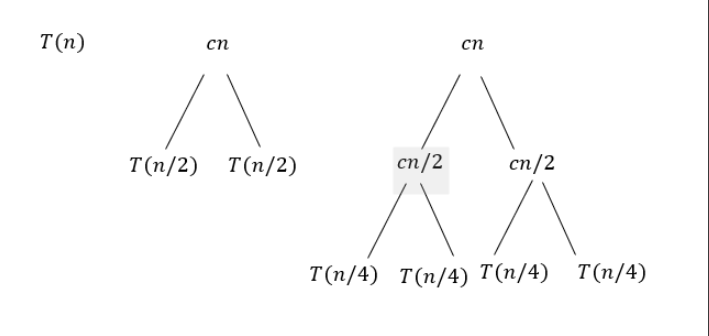

Hasta conseguir el siguiente árbol y los valores aproximados de sus operaciones.


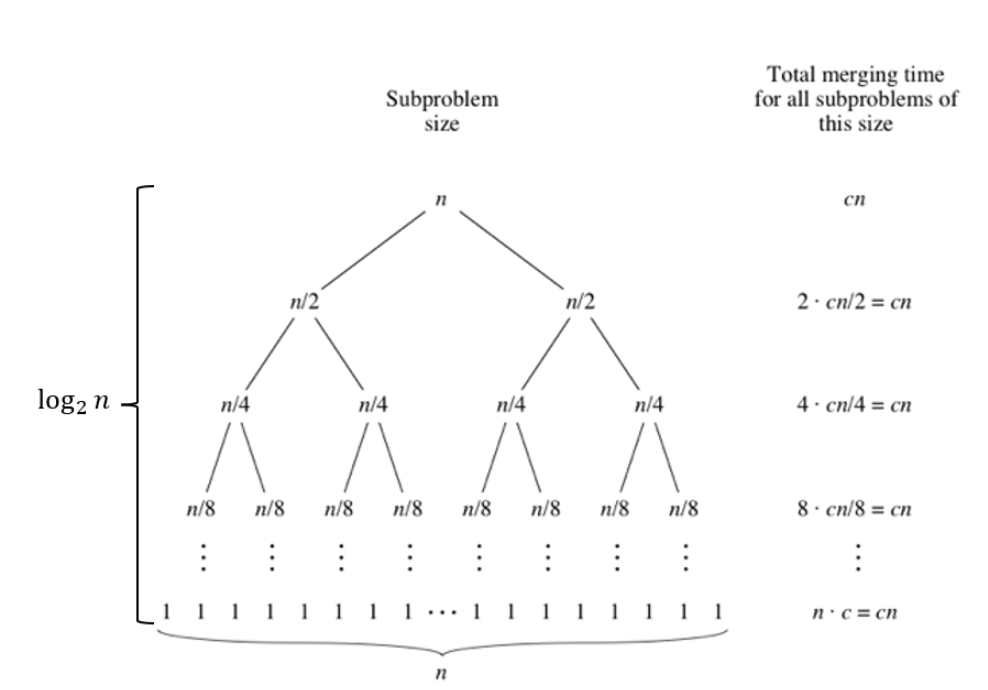

Finalmente analizando el árbol de recursión podemos decir que la suma de todos los tiempos de ejecución es: $cn \log_2 n \rightarrow O(n \log n)$.

####**Para el caso promedio**

Este caso se considera ya que normalmente es difícil conseguir siempre la mediana entre los datos para llegar al mejor caso. Por esta misma razón consideraremos que el caso promedio será conseguir datos que dividan nuestro arreglo en una razón de 3:1.

Considerando la función definida anteriormente para el caso promedio y empezando a armar el árbol de la misma manera que en el caso anterior, este nos quedaría tal que así.



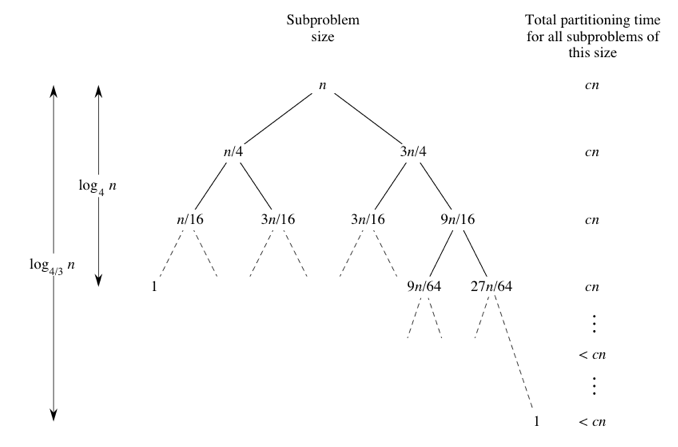

Como podemos apreciar en la siguiente imagen, si hacemos las sumas de todas sus operaciones nos quedará la siguiente aproximación de su tiempo de ejecución: $cn \cdot log_\frac{4}{3}n → O(nlogn)$.

Por lo tanto podemos concluir que el tiempo de ejecución del mejor caso y caso promedio son aproximadamente identicos.

####**Para el peor caso**

El peor caso ocurre cuando nuestro pivote toma el valor mayor de nuestro arreglo para empezar a ordenarlo, en este ejemplo consideraremos que el pivote se encuentra en el final de un arreglo ordenado.

Considerando la función definida anteriormente, el árbol para este caso nos quedaría tal que así.

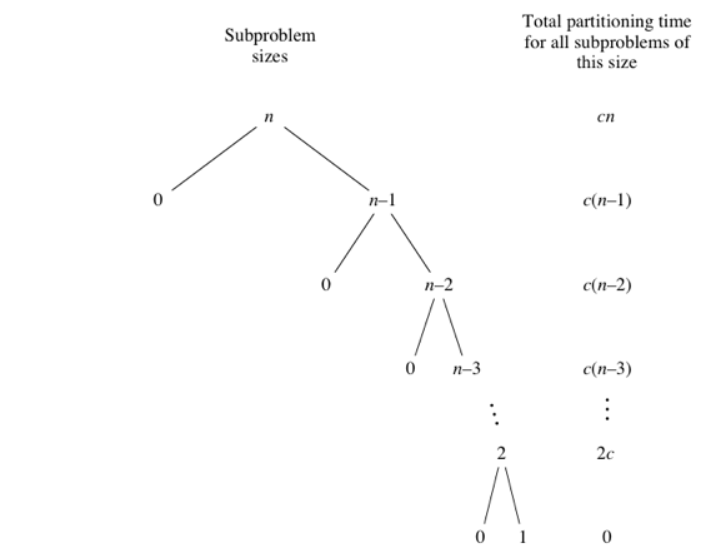

Como podemos apreciar en la siguiente imagen, la suma de sus operaciones nos dará el siguiente tiempo de ejecución: $cn+c(n-1)+c(n-2)+...+2c = c(\sum\limits_{i=0}^{n}(n-i)-1)$, osea $c(\frac{n(n+1)}{2}-1) →O(n^2)$

##Prueba del teorema

Para comprobar el teorema haremos uso del siguiente codigo que comprará la cantidad de comparaciones realizadas por el algoritmo en su caso promedio y el peor caso junto a la aproximación matemática del tiempo de ejecución.



In [166]:

for n in range(1,15):
  x1 = rd.sample(range(1,100), n)
  x2 = [i for i in range(1, n + 1)]
  cont1 = QuickSort(x1,0,len(x1) - 1, False, 0, 3)
  cont2 = QuickSort(x2, 0, len(x2) - 1, False, 0, 1)

  print(n,".-")
  print(" Caso Promedio:", x1)
  print("   Comparaciones =", cont1, ", Aproximación matemática =", (n * mt.log2(n)) // 1, "\n")
  print(" Peor caso:", x2)
  print("   Comparaciones =", cont2, ", Aproximación matemática =", ((n * (n + 1)) // 2) - 1, "\n")

1 .-
 Caso Promedio: [77]
   Comparaciones = 0 , Aproximación matemática = 0.0 

 Peor caso: [1]
   Comparaciones = 0 , Aproximación matemática = 0 

2 .-
 Caso Promedio: [22, 56]
   Comparaciones = 1 , Aproximación matemática = 2.0 

 Peor caso: [1, 2]
   Comparaciones = 1 , Aproximación matemática = 2 

3 .-
 Caso Promedio: [30, 64, 90]
   Comparaciones = 2 , Aproximación matemática = 4.0 

 Peor caso: [1, 2, 3]
   Comparaciones = 3 , Aproximación matemática = 5 

4 .-
 Caso Promedio: [4, 38, 59, 82]
   Comparaciones = 4 , Aproximación matemática = 8.0 

 Peor caso: [1, 2, 3, 4]
   Comparaciones = 6 , Aproximación matemática = 9 

5 .-
 Caso Promedio: [12, 36, 42, 57, 74]
   Comparaciones = 7 , Aproximación matemática = 11.0 

 Peor caso: [1, 2, 3, 4, 5]
   Comparaciones = 10 , Aproximación matemática = 14 

6 .-
 Caso Promedio: [3, 35, 43, 74, 85, 93]
   Comparaciones = 9 , Aproximación matemática = 15.0 

 Peor caso: [1, 2, 3, 4, 5, 6]
   Comparaciones = 15 , Aproximación matemátic

Como podemos apreciar en los resultados lanzados por el codigo, se puede ver una aproximación entre las comparaciones del algoritmo y de la aproximación matemática, confirmando que la complejidad del peor caso es $O(n^2)$ y la del caso promedio $O(nlogn)$.

#4. Correctitud

**Teorema de (Correctitud)**

El algoritmo QuickSort recibe una secuencia de $n$ números $[a_1,a_2,...,a_n]$ y retorna una la misma secuancia de números ordenados de menor a mayor: $a'_1 \leq a'_2 \leq ... \leq a'_n$.

##Prueba del teorema

Previamente obsevarmos que el algoritmo se llama constantemente de forma recursiva y además hace uso de una función auxiliar para poder ordenar los datos llamada "partition".

Por esta misma razón se realizará la prueba de correctitud de la función QuickSort con la ayuda de la inducción matemática y al final utilizaremos la propiedad del bucle invariante para demostrar la correctitud de la función partition.

##Prueba del teorema (Función Partition)

La función Partition tienen como entrada 1 arreglo el cual en la parte izquierda de un pivote dejará los números menores a él y en la parte derecha dejará los valores mayores a él.

Para analizar el algoritmo con la propiedad del bucle invariante primero debemos verificar la inicialización $(i = 0, j = 0)$ y luego si este se mantiene durante la ejecución del algoritmo.

> Al comienzo de cada iteración $i$ y $j$ donde estás dos variables empezarán al inicio del arreglo y los valores que estén en posiciones menores a $i$ serán valores menores al pivote y lo que se encuentren entre $i$ y $j$ serán mayores al pivote.

**Inicialización**

Al comienzo de cada iteración $(i = 0, j = 0)$, como solo hay un elemento en esa posición se considera que está ordenado como indica el teorema.

**Mantención**

Empezamos considerando que al principio de la iteración la propiedad se cumple, es decir que en las posición $k < i$ se encuentran los valores menores al pivote $p$ y en las posiciones $i \leq k \leq j$ se encuentran los valores mayores a $p$ como se muestra en la figura.

Durante la iteración del Partition la posición $j$ aumenta en 1 y se verifica si el valor que se encuentra en esa posición es menor al pivote, si es así se realiza un cambio de valores entre el que se encuentra en la posición $i$ con el de la posición $j$.

Al finalizar la iteración (y al comienzo de la siguiente) se sigue cumpliendo la propiedad del bucle invariante.

##Prueba del teorema (Función QuickSort)

En inducción matemática para demostrar una declaración $P(n)$, para todos lo números naturales $n$ debemos realizar los siguiente pasos.

1. Probar $P(n)$ con un caso, por ejemplo $P(1)$.
2. Consideramos que para un caso $P(m)$ donde $m < n$ el teorema funciona, si esto ocurre por lo tanto para $P(n)$ también lo hará.

Para nuestro caso base $P(1)$ el algoritmo al recibir un arreglo de largo 1 automaticamente lo conserará ordenado, por lo tanto nuestro primer paso es correcto.

Para nuestro segundo caso, considerando que la función recibirá un arreglo de largo $n$, este lo irá dividiendo en sub-arreglos de largo $m = \frac{n}{2}$ (esto en el mejor caso). hasta conseguir arrays de largo $m = 1$, pero como este es nuestro caso base el cual está probado, nuestro segundo caso también es correcto.

#5. Experimentos

##5.1. Número de comparaciones

A continuación se muestra gráficamente una comparación entre:

* Cantidad comparaciones del peor caso calculadas matemáticamente.
* Cantidad comparaciones del mejor caso calculadas matemáticamente (n-1 comparaciones si el arreglo está ordenado y el pivote se ubica en la última posición del arreglo). 
* Cantidad de comparaciones para entradas aleatorias, realizadas experimentalmente.
*   Comparación entre la cantidad de comparaciones entre QuickSort y MergeSort.

Para problemas con $n ∈ [5,100]$.

Los arreglos de entrada son:

* Casos aleatorios: La secuancia será un arreglo de números aleatorios entre 1 y 100, con $n$ cantidad de elementos.
* Peor Caso: La secuencia será un arreglo ordenado desde 0 hasta $n - 1$.

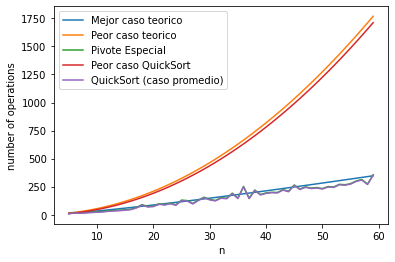

In [167]:
x = [n for n in range(5,60)]
y1 = [n* mt.log2(n) for n in range(5,60)] #Mejor Caso
y2 = [(n*(n+1)/2)-1 for n in range(5,60)] #Peor Caso
y3 = [] #Almacenará caso con pivote siendo la media de 3 números aleatorios
y4 = [] #Almacenará el peor caso
y5 = [] #Almacenará caso Promedio

for n in range(5,60):
  a = rd.sample(range(1, 100), n) #caso aleatorio
  b = a.copy() #caso con pivote especial
  c = [i for i in range(0,n)] #peor caso
  cont = QuickSort(b,0,len(a) - 1,False,5)
  y3.append(cont)
  cont2 = QuickSort(c, 0, len(c) - 1,False, 1)
  y4.append(cont2)
  cont3 = QuickSort(a,0,len(b) - 1,False ,1)
  y5.append(cont3)

plt.plot(x,y1)
plt.plot(x,y2)
plt.plot(x,y3)
plt.plot(x,y4)
plt.plot(x,y5)
plt.legend(["Mejor caso teorico", "Peor caso teorico", "Pivote Especial", "Peor caso QuickSort", "QuickSort (caso promedio)"])

plt.xlabel('n')
plt.ylabel('number of operations')
plt.show()

**Analisis de los resultados**

Como podemos apreciar en el grafico anterior, se confirma que nuestro mejor caso calculado con el pivote "Especial" (mediana aritmetica de 3 elementos aleatorios) y el mejor caso teorico son aproximadamente identicos, también se debe recalcar que es mucho más estable que nuestro caso promedio, ya que a medida que avanza el grafico el caso promedio tiene variaciones mucho mayores en comparación al caso del pivote "Especial", por lo tanto esto confirma que nuestro mejor caso y caso promedio tiene una complejidad de $O(nlogn)$.

Para el peor caso podemos ver que es identico al peor caso teorico, esto ocurre ya que nuestro pivote toma el valor del valor más grande de nuestro array provocando una cantidad de $n - 1$ comparaciones. Por lo tanto se confirma que la complejidad temporal de nuestro peor caso es de $O(n^2)$.


##QuickSort vs MergeSort

###Codigo MergeSort()

In [169]:
def Merge(lista1, lista2, cont, verbose = False):
  i, j = 0, 0
  resultante = []

  if verbose:
    print("INGRESO DE LA FUNCIÓN MERGE\n")
    print("Entrada: Lista 1: ", str(lista1)[1:-1])
    print("         Lista 2: ", str(lista2)[1:-1], "\n")

  while (i < len(lista1) and j < len(lista2)):

    if verbose:
      if len(lista1) == 1 and len(lista2) == 1:
        print(colored(f"{str(lista1[i])}", "red"),"  <=  ",  colored(f"{str(lista2[j])}", "red"), "?")
      elif i == 0 and j == 0:
        print(colored(f"{str(lista1[i])}", "red"),",", str(lista1[i + 1:])[1:-1],"  <=  ",  colored(f"{str(lista2[j])}", "red"),",", str(lista2[j + 1:])[1:-1], "?")
      elif i == 0 and j > 0:
        print(colored(f"{str(lista1[i])}", "red"),",",str(lista1[i + 1:])[1:-1],"  <=  ", str(lista2[:j])[1:-1],",", colored(f"{str(lista2[j])}", "red"), ",",str(lista2[j + 1:])[1:-1], "?")
      elif i > 0 and j == 0:
        print(str(lista1[:i])[1:-1],",",colored(f"{str(lista1[i])}", "red"),",",str(lista1[i + 1:])[1:-1],"  <=  ", str(lista2[:j])[1:-1],",", colored(f"{str(lista2[j])}", "red"),",",str(lista2[j + 1:])[1:-1], "?")
      else:
        print(str(lista1[:i])[1:-1],",",colored(f"{str(lista1[i])}", "red"), ",",str(lista1[i + 1:])[1:-1],"  <=  ", str(lista2[:j])[1:-1],",", colored(f"{str(lista2[j])}", "red"),",",str(lista2[j + 1:])[1:-1], "?") 
      print("")

    if lista1[i] <= lista2[j]:
      resultante.append(lista1[i])
      cont += 1
      i += 1 
    else:
      resultante.append(lista2[j])
      cont += 1
      j += 1
    
    if verbose: 
      print("Resultante: ", colored(f"{str(resultante)[1:-1]}", "blue"), "\n")

  resultante += lista1[i:]
  resultante += lista2[j:]
  while (i < len(lista1)):
    if verbose:
      print(str(lista1[:i])[1:-1],",",colored(f"{str(lista1[i])}", "red"),",",str(lista1[i + 1:])[1:-1],"  <=", colored(f"ø") ,"?")
    cont += 1
    i += 1
  while (j < len(lista2)):
    if verbose:
      print(colored(f"ø", "red"),"  <=  ", str(lista2[:j])[1:-1],",", colored(f"{str(lista2[j])}", "red"), ",",str(lista2[j + 1:])[1:-1], "?")
    j += 1
    cont += 1

  if verbose: 
    print("Salida función Merge: ", colored(f"{str(resultante)[1:-1]}", "blue"), "\n")

  return resultante, cont

In [170]:
def MergeSort(lista,cont = 0, divisiones = 0,verbose = False):
  if (len(lista) == 1): return lista, cont, divisiones
  divisiones += 1

  if verbose:
    print("Entrada: ", str(lista)[1:-1], "\n")

  q = len(lista) // 2
  if verbose: 
    print("Parte Derecha: ", colored(f"{str(lista[:q])[1:-1]}", "green"))
    print("Parte Izquierda: ", colored(f"{str(lista[q:])[1:-1]}", "yellow"), "\n")

  listaD, cont, divisiones = MergeSort(lista[:q],cont,divisiones,verbose)
  listaI, cont, divisiones = MergeSort(lista[q:],cont,divisiones,verbose)

  lista, cont = Merge(listaD, listaI, cont,verbose)
  return lista, cont, divisiones

Ahora apreciaremos un grafico comparativo entre el QuickSort y el MergeSort.

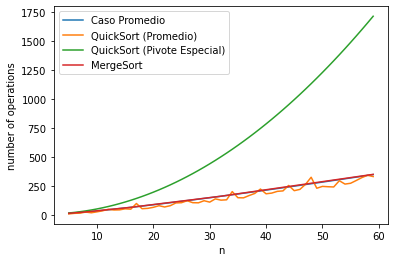

In [186]:
x = [n for n in range(5,60)]
y = [n*mt.log2(n) for n in range(5,60)] # Caso promedio entre ambos algoritmos
y1 = [] # Comparaciones para QuickSort (Promedio)
y2 = [] # Comparaciones para QuickSort (Pivote Especial)
y3 = [] # Comparaciones para MergeSort

for n in range(5,60):
  a = rd.sample(range(1, 100), n) # Caso aleatorio
  b = a.copy()
  c = a.copy()
  cont = QuickSort(b,0,len(a) - 1,False, 1)
  y1.append(cont)
  cont2 = QuickSort(b,0,len(b) - 1,False,5)
  y2.append(cont2)
  c, cont3, div = MergeSort(c)
  y3.append(cont3)

plt.plot(x,y)
plt.plot(x,y1)
plt.plot(x,y2)
plt.plot(x,y3)
plt.legend(["Caso Promedio", "QuickSort (Promedio)", "QuickSort (Pivote Especial)", "MergeSort"])

plt.xlabel('n')
plt.ylabel('number of operations')
plt.show()

**Analisis de los resultados**

Como se puede apreciar en el grafico anterior, mientras el largo del arreglo se vuelve más grande el QuickSort al elegir un pivote al extremo de un arreglo aleatorio se vuelve cada vez más inestable en comparación al MergeSort, o en comparación al mismo algoritmo pero con un pivote calculado matemáticamente, a pesar de todo este último calculo del pivote para el QuickSort obtiene una cantidad de comparaciones muy cercanas a las que realiza el MergeSort, por lo tanto esto quiere decir que mientras elijamos un pivote más aproximado a la mediana de todos los datos el algoritmo se volverá más estable.

A pesar de todo esto hay que considerar que le MergeSort utiliza memoria adicional en comparación al QuickSort, así que podemos concluir que el QuickSort con este pivote "Especial" es un mejor algoritmo de ordenamiento que el MergeSort.

##5.2. Tiempo de ejecución (Experimental)

En el siguiente gráfico se reporta el tiempo de ejecución del algoritmo QuickSort y MergeSort en función del tamaño del problema para arreglos generados aleatoreamente de largos entre 1 y 500.

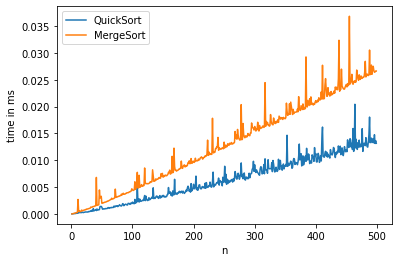

In [185]:
x=[]; y=[]
y2=[]

for n in range(1,500):

  a = rd.sample(range(1, 1000), n)
  b = a.copy()

  #la función repeat está ejecutando 20 veces bubble_sort con el arreglo a y retorna el mejor tiepo obtenido.
  t = repeat(setup="from __main__ import QuickSort", stmt=f"QuickSort({a},{0},{len(a) - 1},{False},{0},{1})", repeat=1, number=10)
  t2 = repeat(setup="from __main__ import MergeSort", stmt=f"MergeSort({b})", repeat=1, number=10)

  x.append(n)
  y.append(t)
  y2.append(t2)


plt.plot(x,y)
plt.plot(x,y2)
plt.legend(["QuickSort", "MergeSort"])

plt.xlabel('n')
plt.ylabel('time in ms')
plt.show()